<a href="https://colab.research.google.com/github/miguelcmateus10/MigAut/blob/main/Assignment_1_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Automation 2025/26 - Assignment 1

To be delivered until 2025-12-05 23:59:59.

**Submission Notes**:
- Create a folder in your group's GitHub repository to solve this assignment. Copy this notebook into that folder.
- You should commit regularly to your repository the answers to the questions in this notebook. If you do not, your grade will be penalized by 1/20 points.
- After running the entire notebook (including graphs and outputs), save the notebook as a .pdf file, by going to File - Print - Destination: Save as PDF.
- Create a .zip file containing both the .ipynb file (the notebook itself) and the .pdf and submit it in Fénix.

# Problem description

The dataset for this assignment contains information on students from two Portuguese secondary schools enrolled in a mathematics course.
Each row corresponds to one student and includes demographic and family background variables (e.g., basic personal and household characteristics), school-related variables (e.g., school context, study habits, past failures), behavioral and lifestyle indicators (e.g., free time, going out, alcohol use), and the grades for the three school periods, on a 0–20 scale.

The goal is to predict the performance of the students in the final period.
First, the problem will be approached as a classification task, predicting whether a student will pass (G3 >= 10) or fail (G3 < 10) the course.
Then, the problem will be approached as a regression task, predicting the actual final grade (G3).

A detailed description of all variables (family context, behavioral, school performance, etc.) is provided in the file `variable_description.txt`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported and display options set.")

Libraries imported and display options set.


# Part 1 - Data exploration **(4.00)**

##### **1.1.** Load the dataset from the CSV file `mathematics_grades.csv`. **(0.25)**

In [ ]:
df=pd.read_csv('mathematics_grades.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,failed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,False
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,False
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,False


##### **1.2.** Identify the feature types of each variable in the dataset. **(1.50)**

In [ ]:
print("DataFrame Info:")
df.info()

print("\nDataFrame dtypes:")
print(df.dtypes)

# Separating numerical and categorical columns for a clearer view
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("\nNumerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      357 non-null    object
 1   sex         357 non-null    object
 2   age         357 non-null    int64 
 3   address     357 non-null    object
 4   famsize     357 non-null    object
 5   Pstatus     357 non-null    object
 6   Medu        357 non-null    int64 
 7   Fedu        357 non-null    int64 
 8   Mjob        357 non-null    object
 9   Fjob        357 non-null    object
 10  reason      357 non-null    object
 11  guardian    357 non-null    object
 12  traveltime  357 non-null    int64 
 13  studytime   357 non-null    int64 
 14  failures    357 non-null    int64 
 15  schoolsup   357 non-null    object
 16  famsup      357 non-null    object
 17  paid        357 non-null    object
 18  activities  357 non-null    object
 19  nursery     357 non-null    object

##### **1.3** Check if the dataset has missing values. If so, discard any row that has a missing value. **(0.25)**

In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

# Check if there are any missing values
if df.isnull().sum().sum() > 0:
    print("\nMissing values detected. Dropping rows with missing values...")
    initial_rows = df.shape[0]
    df.dropna(inplace=True)
    rows_after_dropping = df.shape[0]
    print(f"Dropped {initial_rows - rows_after_dropping} rows with missing values.")
else:
    print("\nNo missing values detected in the dataset.")

print("\nMissing values after handling:")
print(df.isnull().sum())
print(f"\nDataFrame shape after handling missing values: {df.shape}")

Missing values before handling:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
failed        0
dtype: int64

No missing values detected in the dataset.

Missing values after handling:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0

##### **1.4.** Make a pairplot of the numerical variables, colored by the `failed` variable. **(0.50)**

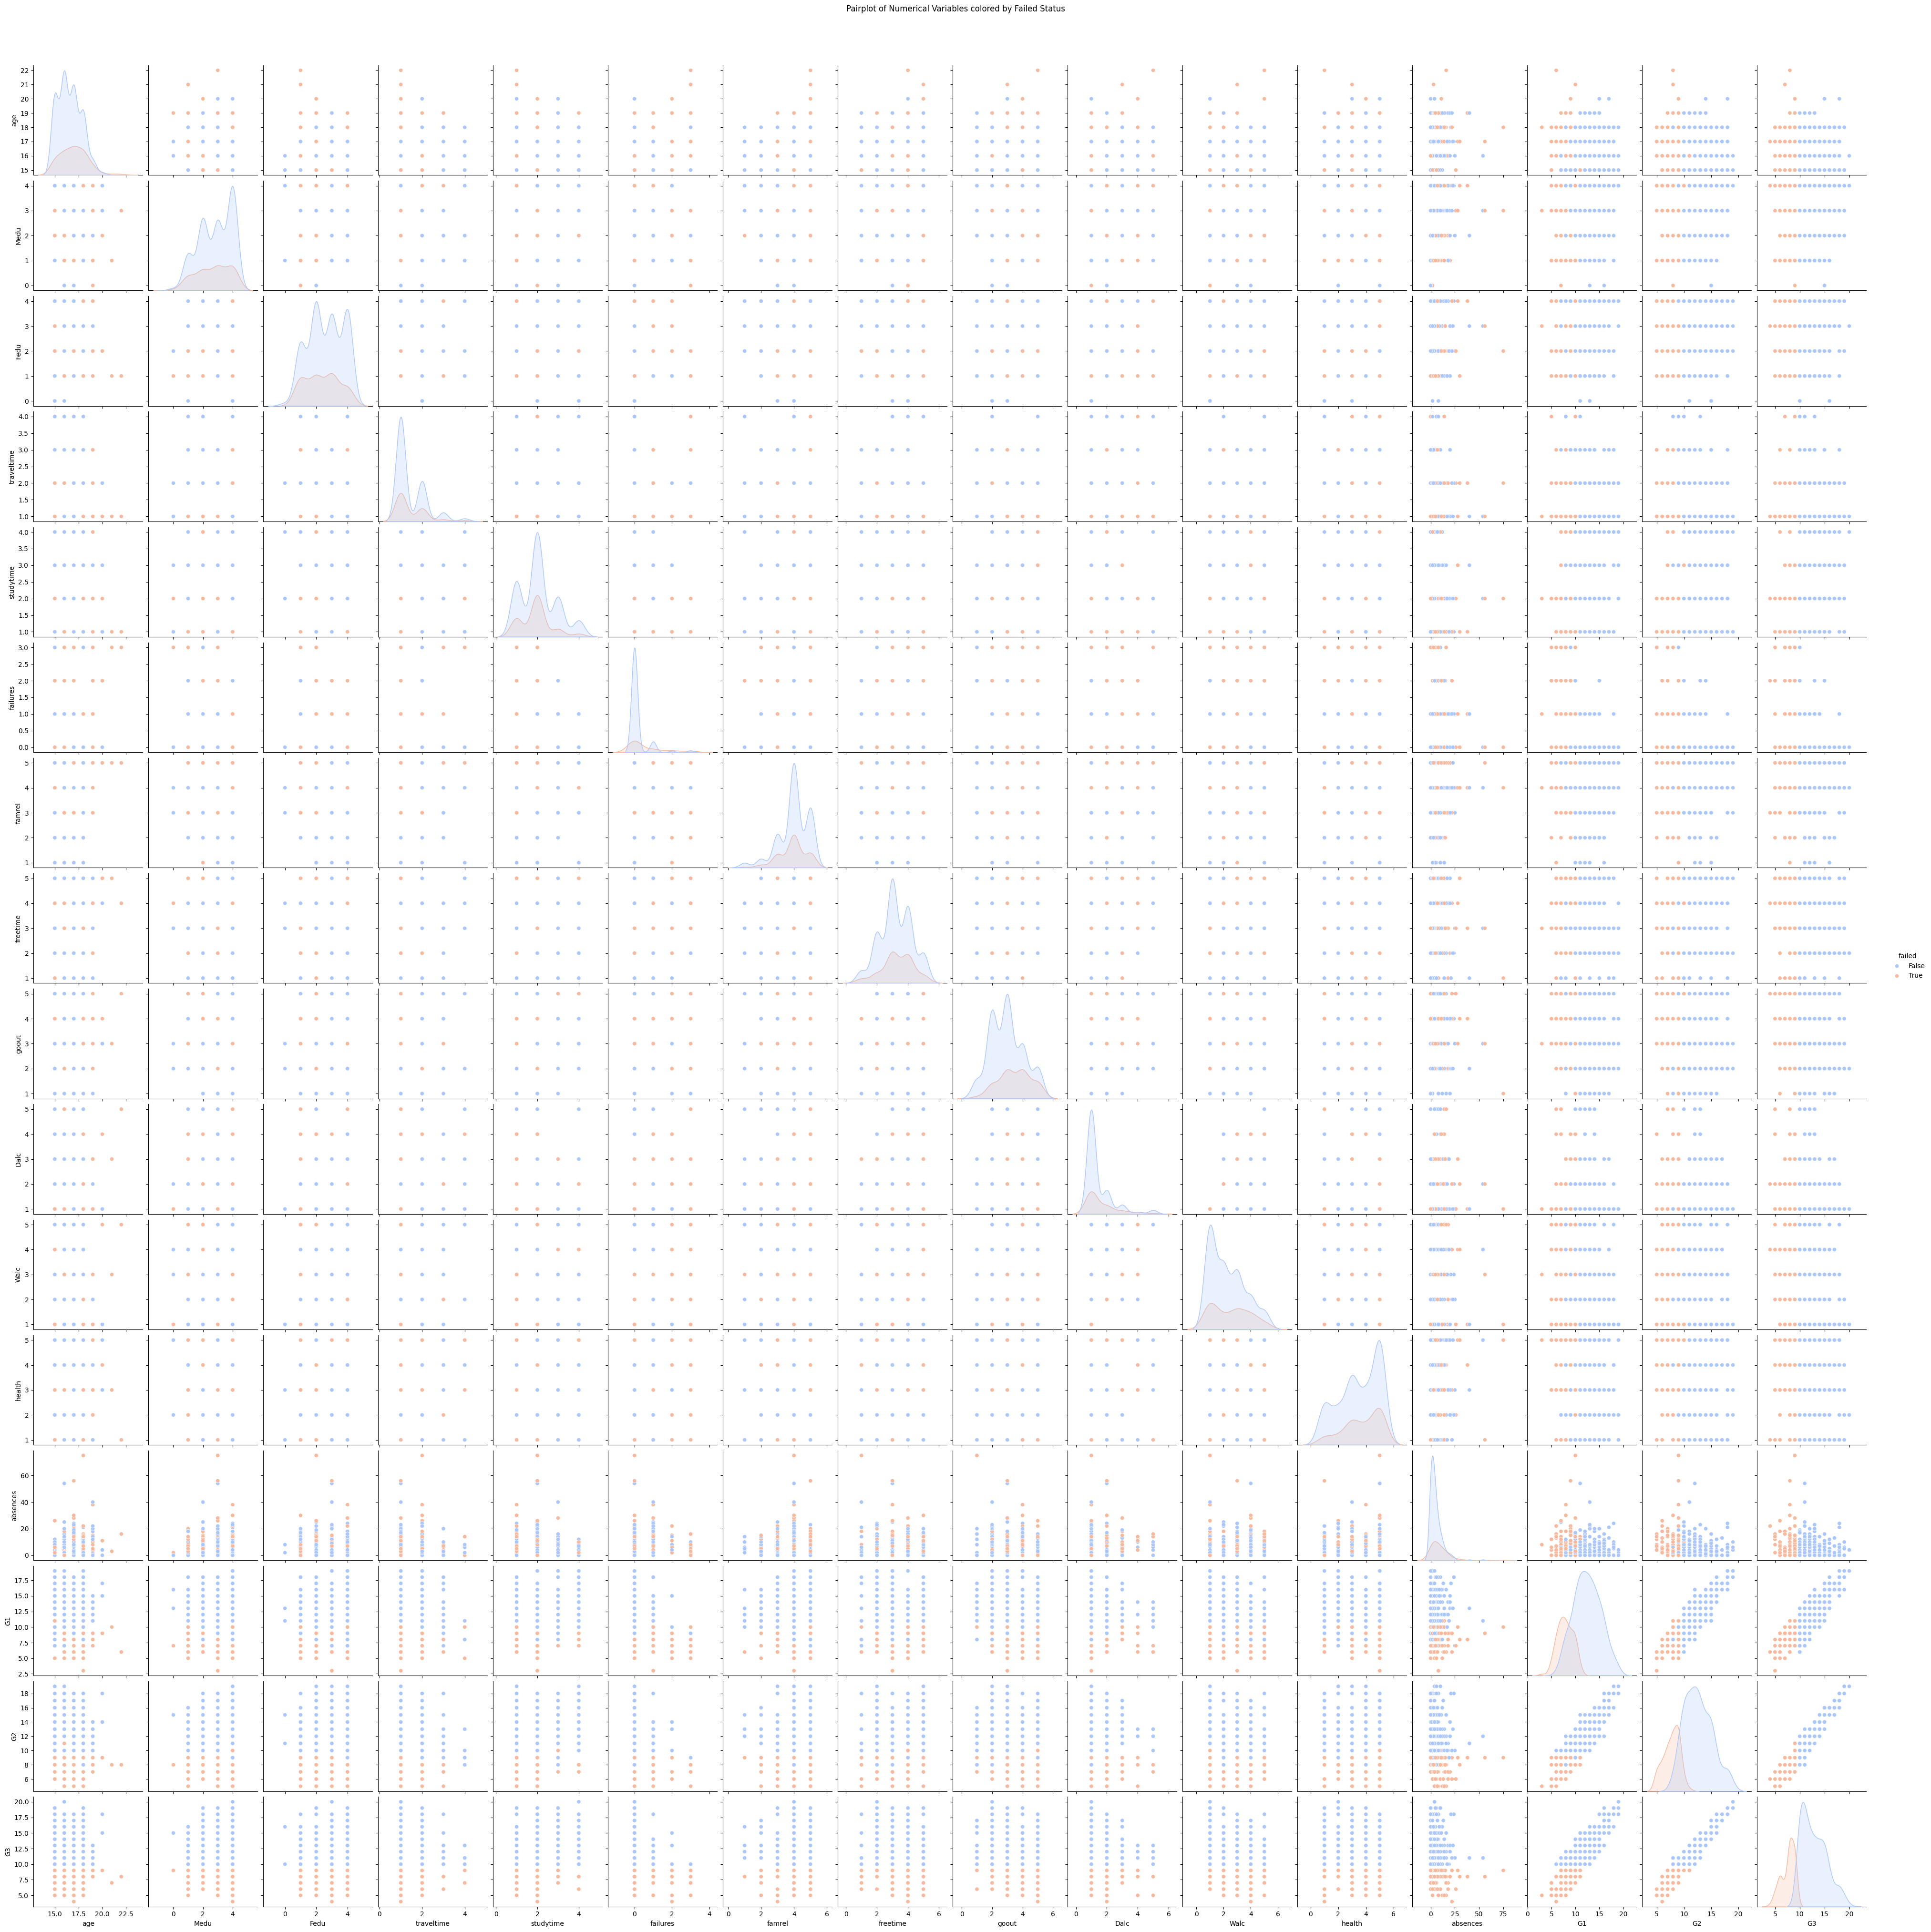

In [ ]:
# Select only numerical columns for the pairplot, and include the 'failed' column for coloring
plot_df = df[numerical_cols + ['failed']]

sns.pairplot(plot_df, hue='failed', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Variables colored by Failed Status', y=1.02) # Adjust suptitle position
plt.show()

##### **1.5.** Make bar plots for each categorical variable, showing the counts for each category, colored by the `failed` variable. **(0.50)**

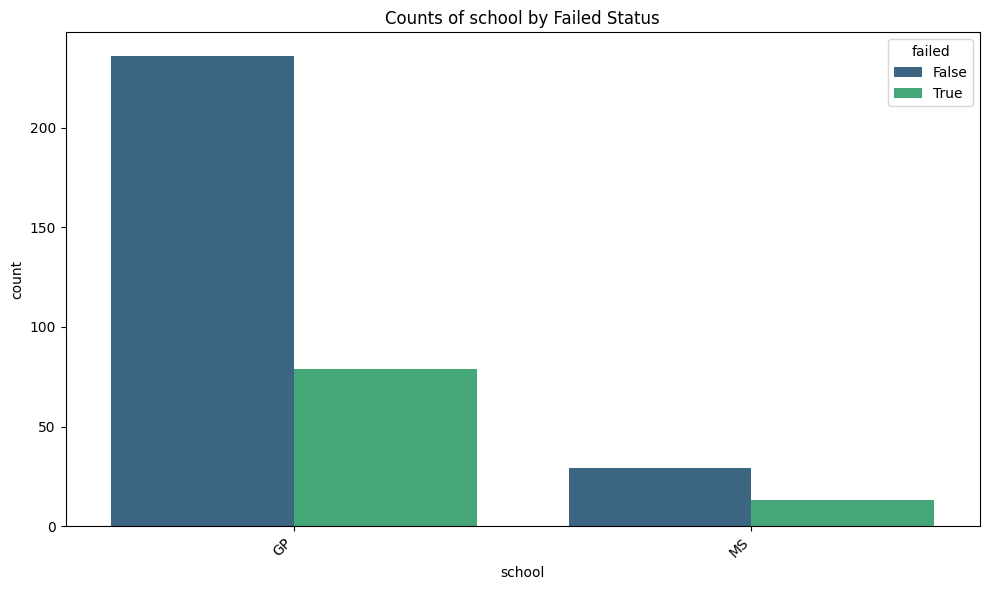

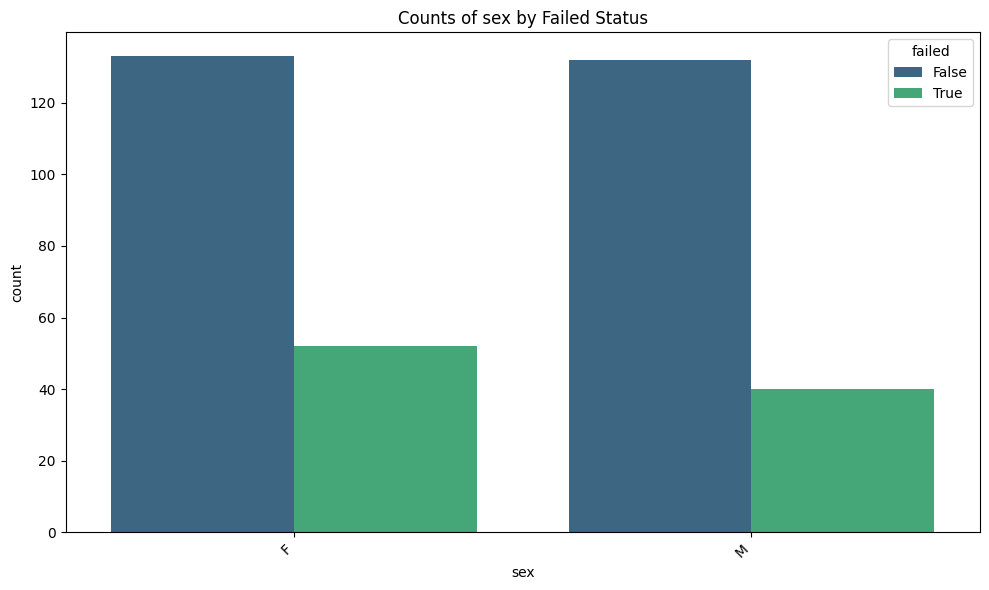

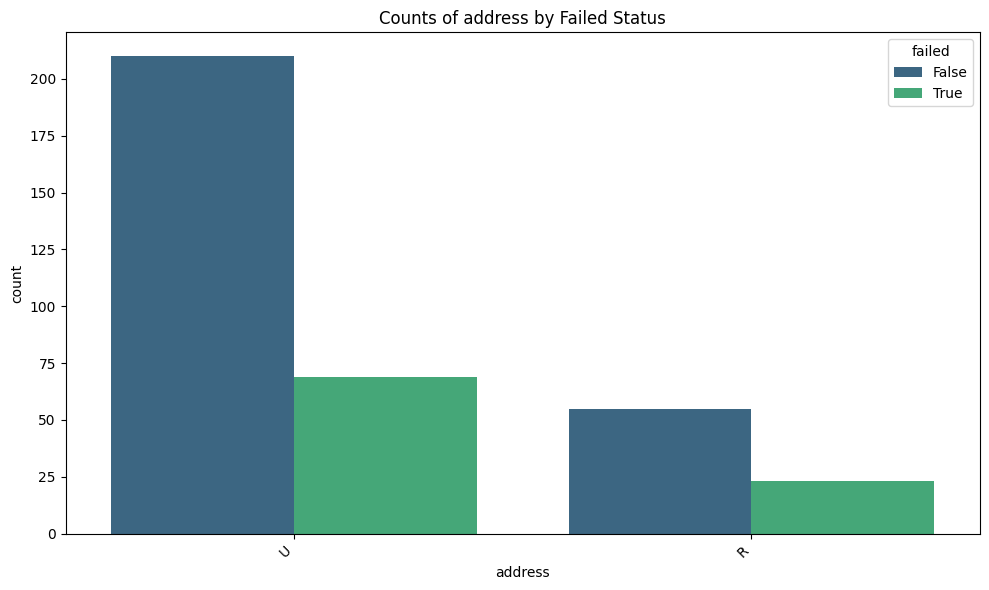

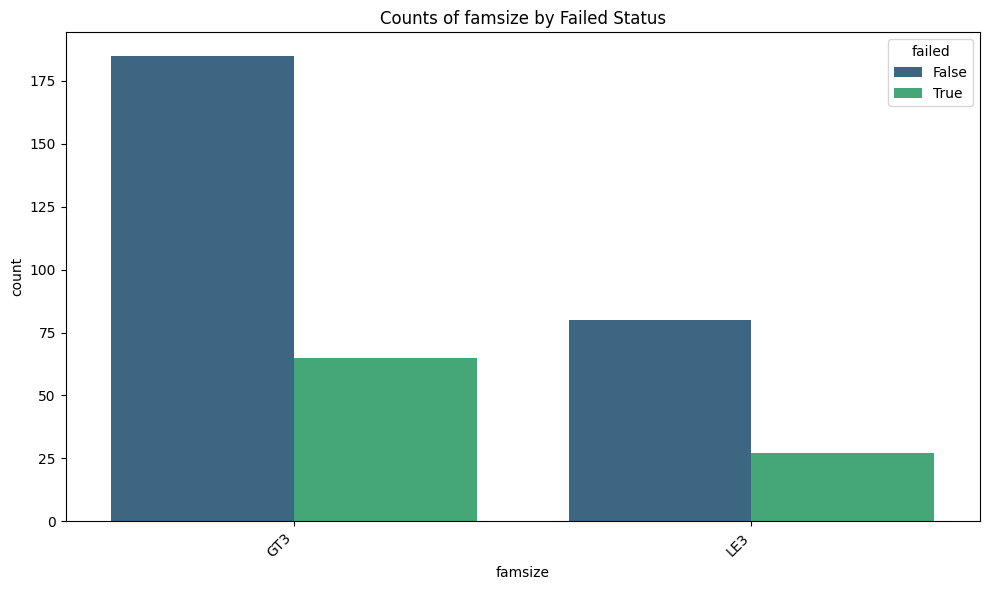

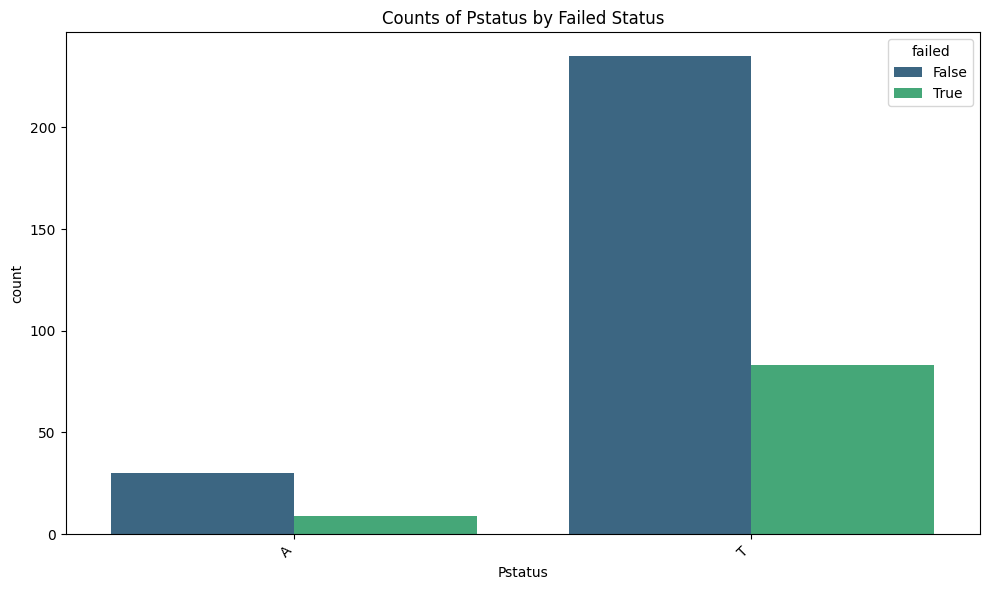

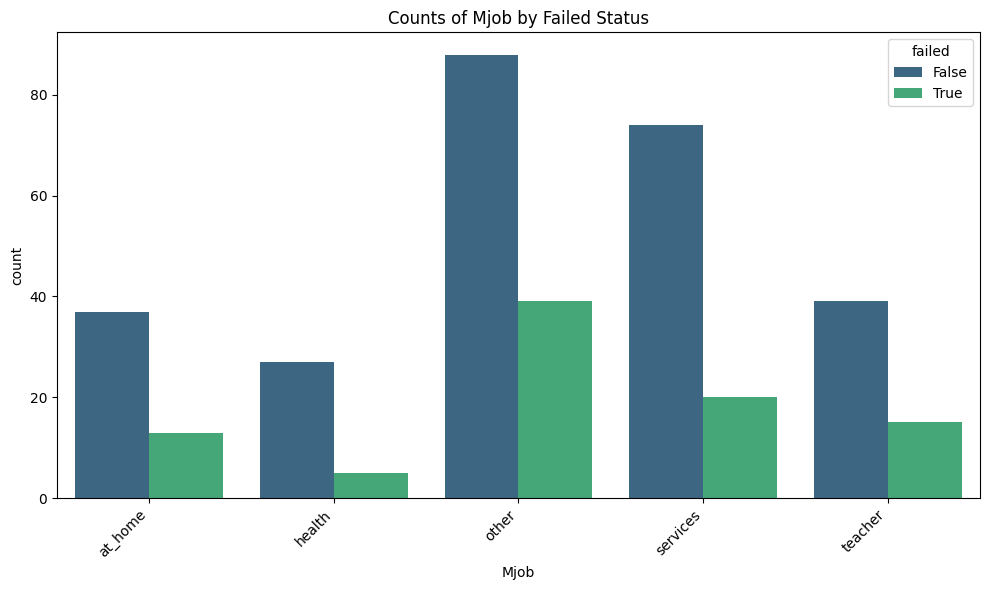

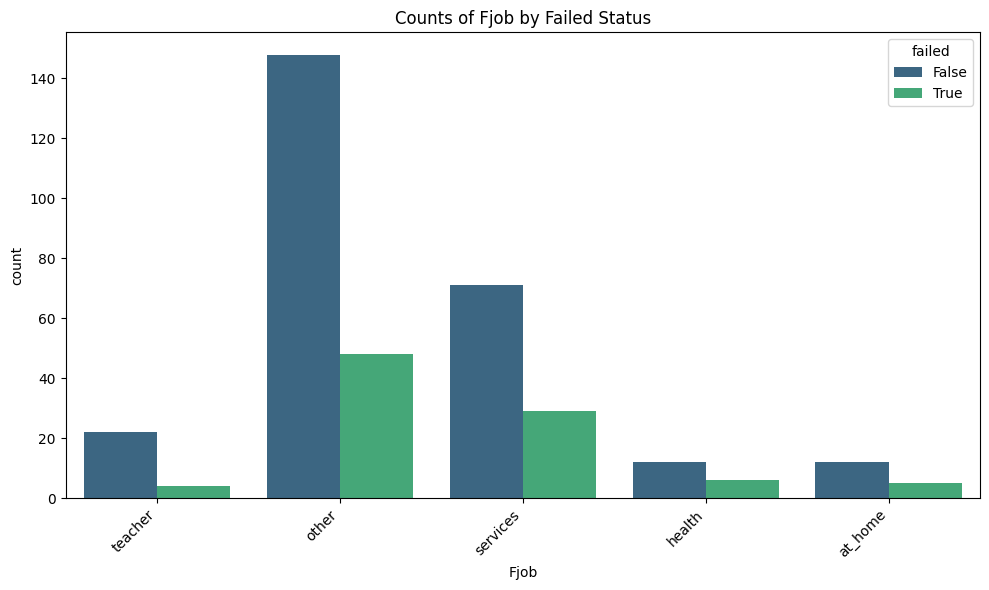

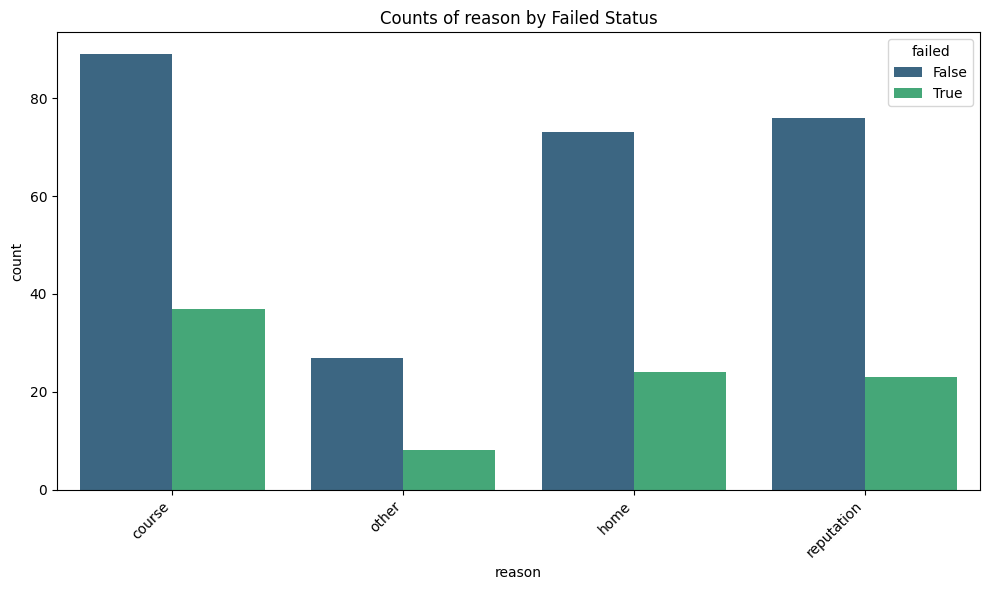

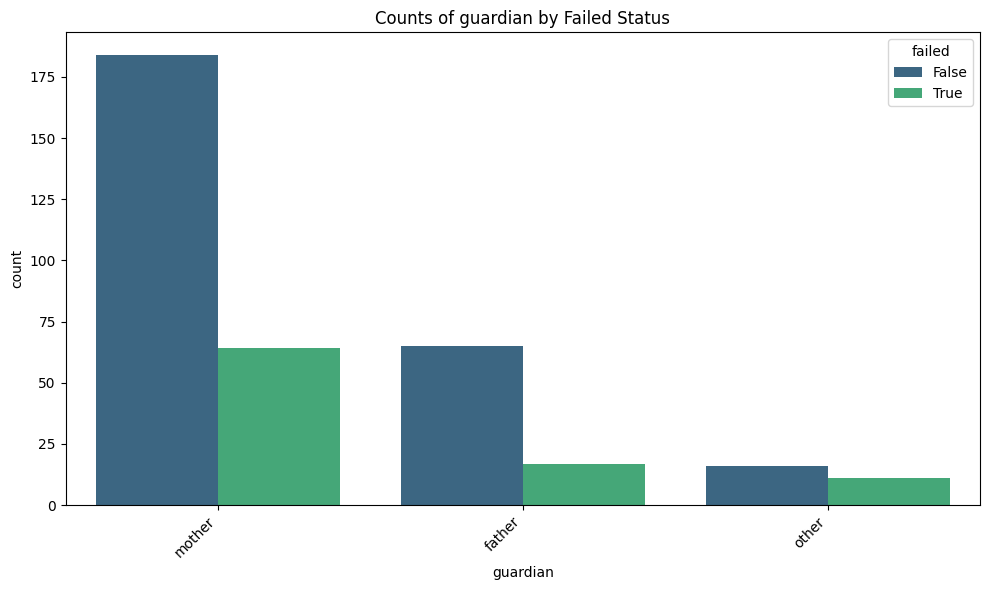

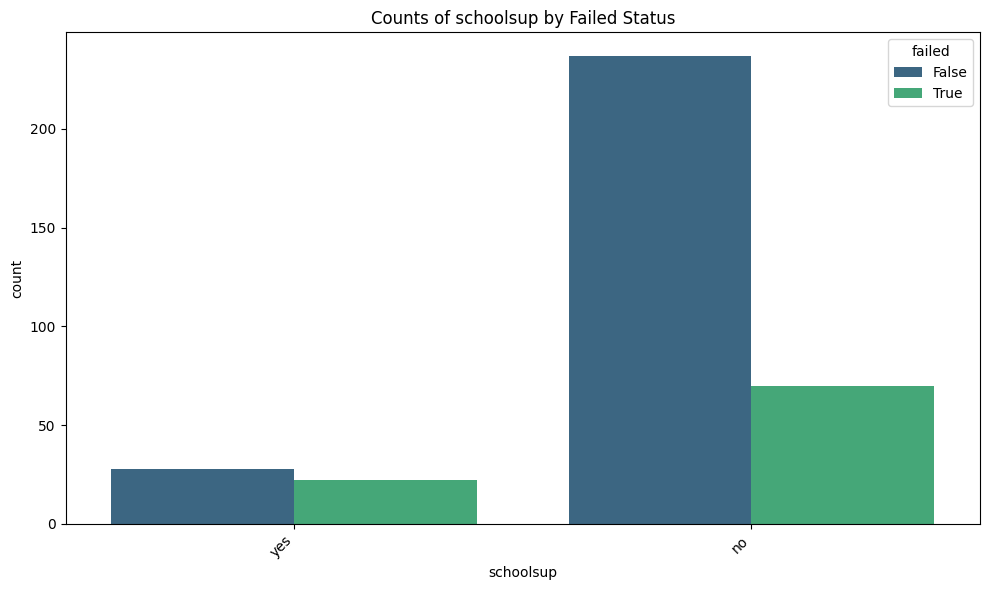

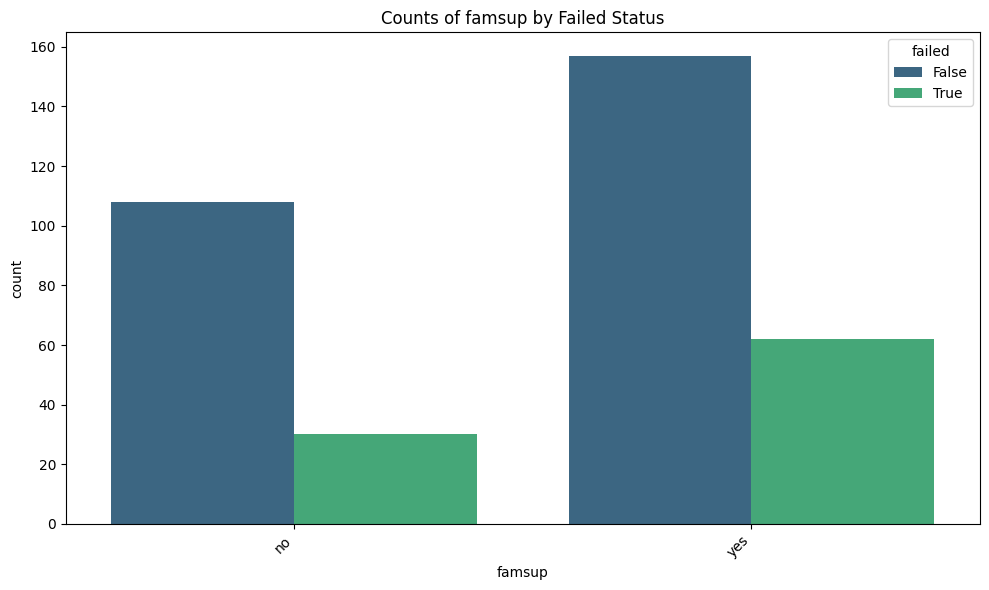

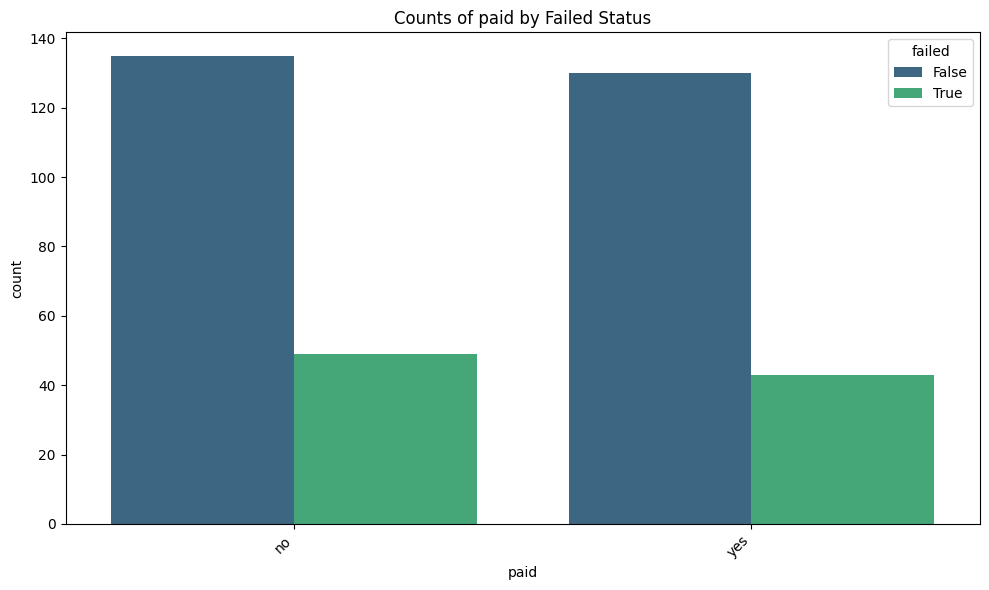

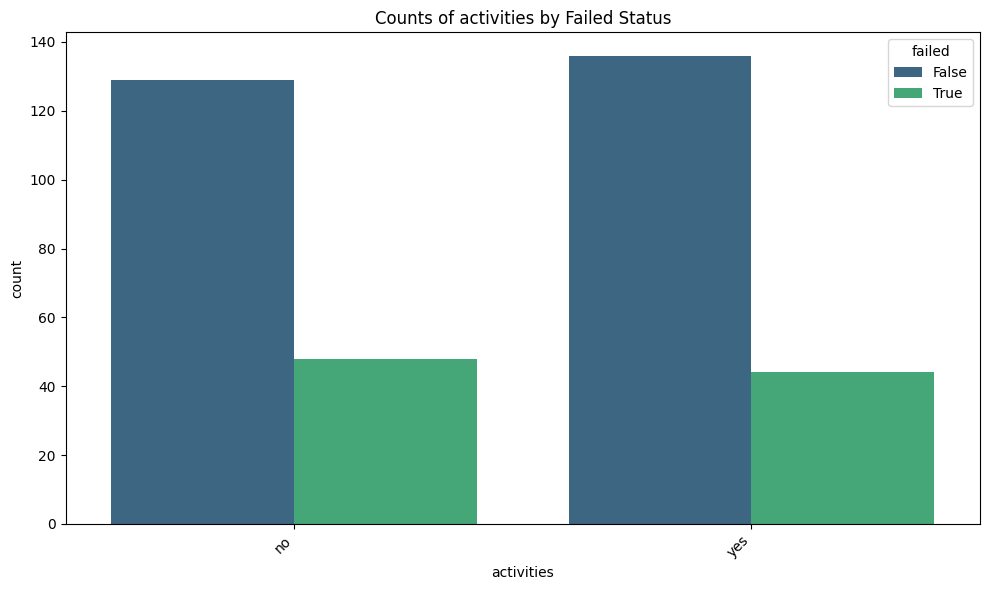

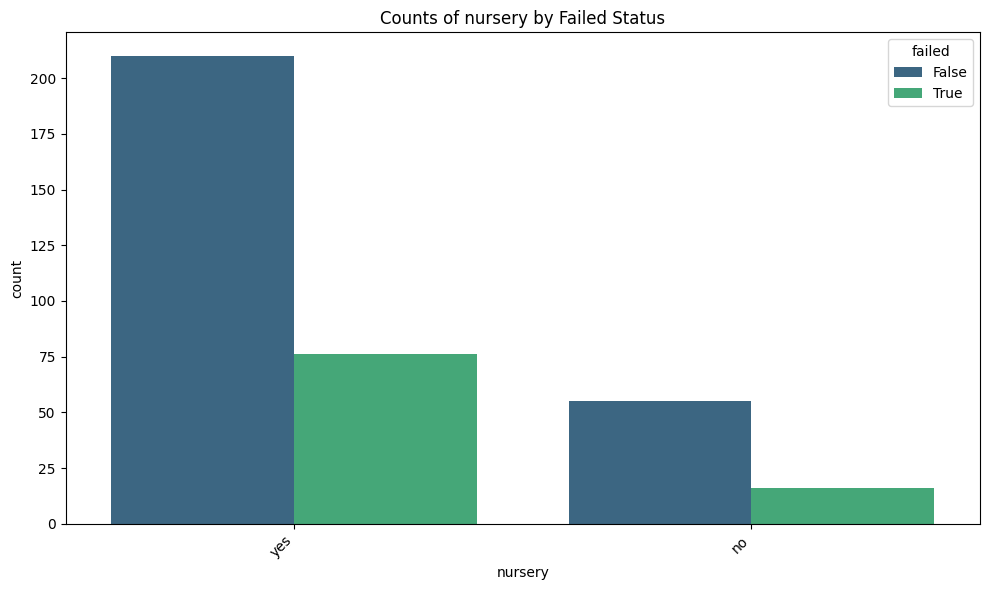

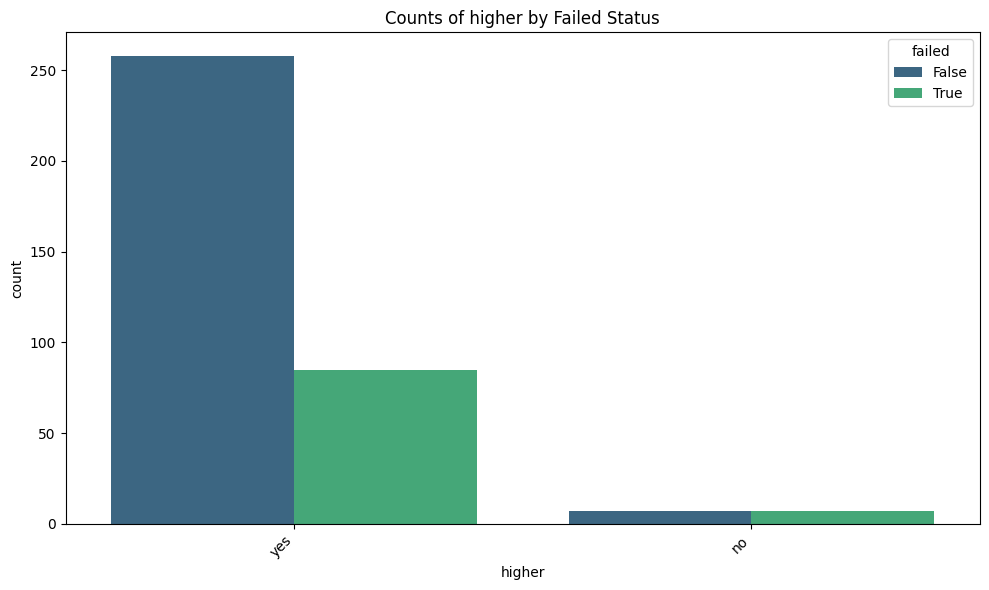

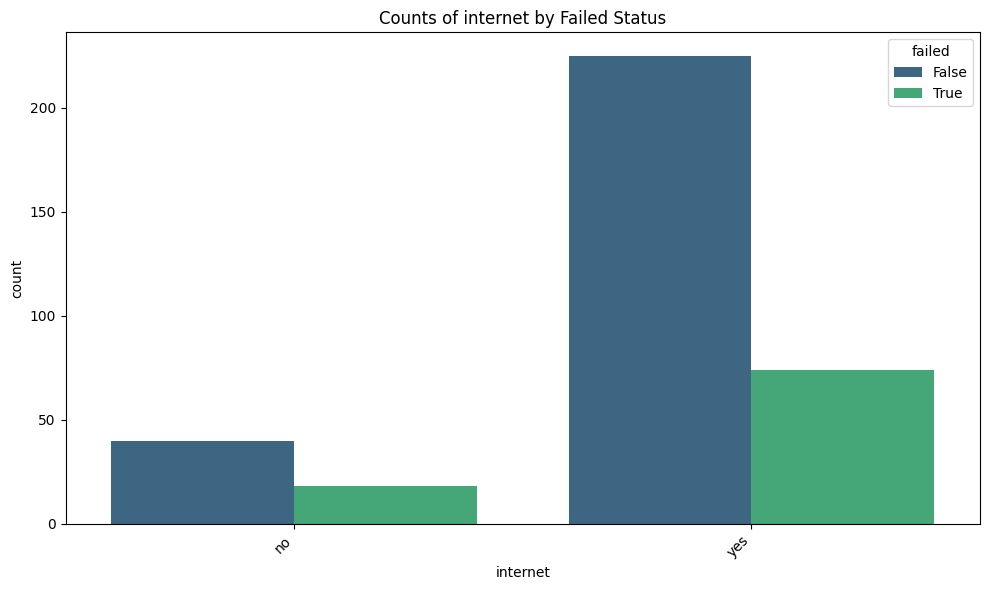

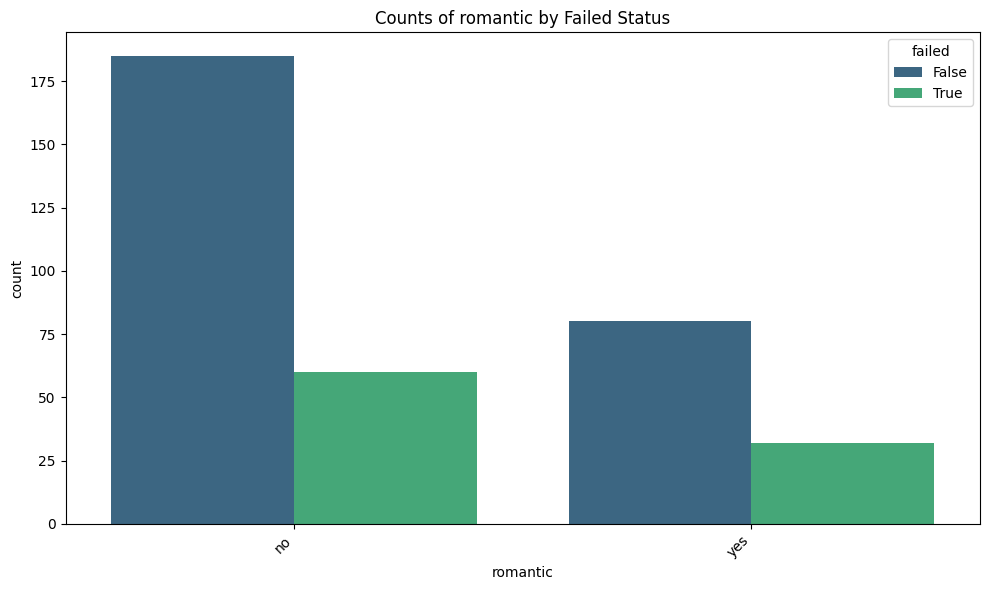

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='failed', palette='viridis')
    plt.title(f'Counts of {col} by Failed Status')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##### **1.6.** In each school, how many students live in a rural area and do not have internet access at home? **(0.50)**

In [ ]:
# Filter for students living in a rural area ('R') and without internet access ('no')
rural_no_internet_students = df[(df['address'] == 'R') & (df['internet'] == 'no')]

# Group by 'school' and count the number of students
counts_by_school = rural_no_internet_students['school'].value_counts().reset_index()
counts_by_school.columns = ['School', 'Number of Students']

print("Number of students living in a rural area and without internet access, per school:")
print(counts_by_school)

Number of students living in a rural area and without internet access, per school:
  School  Number of Students
0     GP                  17
1     MS                   7


##### **1.7.** Split the dataset into a training set (80%) and a test set (20%). **(0.50)**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('failed', axis=1)
y = df['failed']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Original DataFrame shape: {df.shape}")
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

print("\nDistribution of 'failed' in original data:")
print(y.value_counts(normalize=True))
print("\nDistribution of 'failed' in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of 'failed' in test set:")
print(y_test.value_counts(normalize=True))

Original DataFrame shape: (357, 34)
Training set features shape: (285, 33)
Testing set features shape: (72, 33)
Training set target shape: (285,)
Testing set target shape: (72,)

Distribution of 'failed' in original data:
failed
False    0.742297
True     0.257703
Name: proportion, dtype: float64

Distribution of 'failed' in training set:
failed
False    0.74386
True     0.25614
Name: proportion, dtype: float64

Distribution of 'failed' in test set:
failed
False    0.736111
True     0.263889
Name: proportion, dtype: float64


# Part 2 - Classification **(7.50)**

##### You'll start by approaching the problem as a classification task, predicting whether a student will pass (G3 >= 10) or fail (G3 < 10) the course. Consider the variable `failed` as the target variable.

##### **2.1.** Which performance metric do you think are most important for this prediction task, and why? Justify your answer in the context of supporting students who may struggle academically. **(2.00)**

In [ ]:
with open('/content/feature_descriptions.txt', 'r') as f:
    feature_descriptions = f.read()
print(feature_descriptions)

# Dataset column description:
school - student's school ("GP" or "MS", the school names abbreviated)
sex - student's sex ("F" - female or "M" - male)
age - student's age (from 15 to 22)
address - student's home address type (binary: "U" - urban or "R" - rural)
famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
Medu - mother's education (0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
Fjob - father's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
reason - reason to choose 

A métrica mais importante é a sensibilidade, ou taxa de verdadeiros positivos. Isto porque ao identificar corretamente alunos que chumbem os apoios sáo fornecidos a estes com mais necessidades. Reduzimos também os falsos negativos que neste caso representam alunos que segundo o modelo iriam passar mas na verdade chumbam. Portanto neste caso ao termos uma sensibilidade alta indica que o modelo identifica corretamente os alunos que iram chumbar. E isto é crucial para estes casos visto que é um erro mais crítico falhar a identificar alguém que chumbe, do que identificar um aluno que passe como alguém que chumbe.

##### **2.2.** Build a logistic regression model to predict whether a student will pass or fail the course, using as predictor the feature `absences`. Evaluate the performance of the model on the test set using a confusion matrix, accuracy, precision, recall, f1-score and the metric you selected in question 2.1. **(0.50)**


--- Model Performance Evaluation (using 'absences') ---

Confusion Matrix:
[[42 11]
 [11  8]]


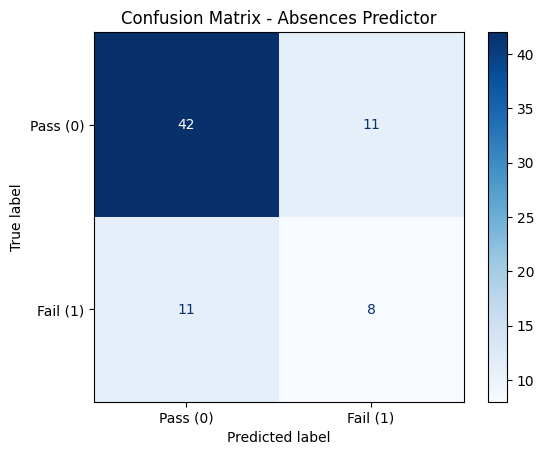


Accuracy: 0.6944
Precision: 0.4211
Recall (Selected Metric): 0.4211
F1-score: 0.4211

Interpretation of Confusion Matrix:
  True Negatives (Correctly predicted as passing): 42
  False Positives (Predicted as failing, but actually passed): 11
  False Negatives (Predicted as passing, but actually failed): 11
  True Positives (Correctly predicted as failing): 8


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare the feature (absences) for training
# Reshape X_train_absences and X_test_absences to be 2D arrays as expected by sklearn models
X_train_absences = X_train[['absences']]
X_test_absences = X_test[['absences']]

# Initialize and train the Logistic Regression model
# Using 'liblinear' solver for small datasets and 'balanced' class_weight to handle potential imbalance
model_absences = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model_absences.fit(X_train_absences, y_train)

# Make predictions on the test set
y_pred_absences = model_absences.predict(X_test_absences)

# Evaluate the model performance
print("\n--- Model Performance Evaluation (using 'absences') ---")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_absences)
print("\nConfusion Matrix:")
print(cm)

# Display the Confusion Matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass (0)', 'Fail (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Absences Predictor")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred_absences)
print(f"\nAccuracy: {accuracy:.4f}")

# Precision (for the 'failed' class, which is True or 1)
precision = precision_score(y_test, y_pred_absences, pos_label=True)
print(f"Precision: {precision:.4f}")

# Recall (for the 'failed' class, which is True or 1) - Metric selected in 2.1
recall = recall_score(y_test, y_pred_absences, pos_label=True)
print(f"Recall (Selected Metric): {recall:.4f}")

# F1-score
f1 = f1_score(y_test, y_pred_absences, pos_label=True)
print(f"F1-score: {f1:.4f}")

print("\nInterpretation of Confusion Matrix:")
print(f"  True Negatives (Correctly predicted as passing): {cm[0, 0]}")
print(f"  False Positives (Predicted as failing, but actually passed): {cm[0, 1]}")
print(f"  False Negatives (Predicted as passing, but actually failed): {cm[1, 0]}")
print(f"  True Positives (Correctly predicted as failing): {cm[1, 1]}")

##### **2.3.** The model you built in question 2.2 likely does not perform very well. Explain why this is the case, considering the distribution of the predictor and the response. How can you improve the model? **(2.00)**

O fraco desempenho do modelo deve-se fundamentalmente à limitação do preditor único (absences), o qual é insuficiente para prever o insucesso escolar, um resultado complexo influenciado por múltiplos fatores como notas anteriores e apoio familiar. A Regressão Logística é incapaz de modelar eficazmente esta relação fraca e potencialmente não linear. Consequentemente, o modelo exibe um baixo Recall de 0.4211, falhando em identificar a maioria dos alunos que realmente chumbam, o que se traduz num elevado número de Falsos Negativos. Para melhorar a performance, é crucial incluir mais características preditivas (como G1, G2, failures e studytime), tratar corretamente as variáveis categóricas, e migrar para modelos mais robustos (como Random Forests ou Gradient Boosting Machines), ajustando-se, por fim, o limiar de classificação para priorizar o Recall.

##### **2.4.** Consider now the variable `studytime` as the predictor and assume it is numerical. Build a logistic regression model to predict whether a student will pass or fail the course. Evaluate the performance of the model on the test set using a confusion matrix, accuracy, precision, recall, f1-score and the metric you selected in question 2.1. **(0.50)**

Note: Use `sklearn.linear_model.LogisticRegression(class_weight='balanced')` for your logistic regression model.


--- Model Performance Evaluation (using numerical 'studytime') ---

Confusion Matrix:
[[41 12]
 [15  4]]


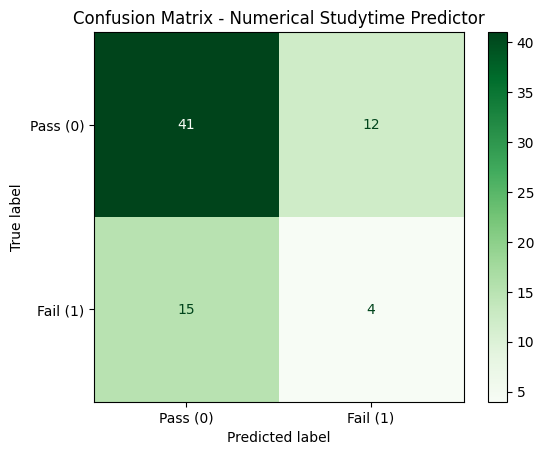


Accuracy: 0.6250
Precision: 0.2500
Recall (Selected Metric): 0.2105
F1-score: 0.2286

Interpretation of Confusion Matrix:
  True Negatives (Correctly predicted as passing): 41
  False Positives (Predicted as failing, but actually passed): 12
  False Negatives (Predicted as passing, but actually failed): 15
  True Positives (Correctly predicted as failing): 4


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare the feature (studytime) for training, assuming it is numerical
X_train_studytime_numerical = X_train[['studytime']]
X_test_studytime_numerical = X_test[['studytime']]

# Initialize and train the Logistic Regression model with balanced class weights
model_studytime_numerical = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model_studytime_numerical.fit(X_train_studytime_numerical, y_train)

# Make predictions on the test set
y_pred_studytime_numerical = model_studytime_numerical.predict(X_test_studytime_numerical)

# Evaluate the model performance
print("\n--- Model Performance Evaluation (using numerical 'studytime') ---")

# Confusion Matrix
cm_num = confusion_matrix(y_test, y_pred_studytime_numerical)
print("\nConfusion Matrix:")
print(cm_num)

# Display the Confusion Matrix visually
disp_num = ConfusionMatrixDisplay(confusion_matrix=cm_num, display_labels=['Pass (0)', 'Fail (1)'])
disp_num.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Numerical Studytime Predictor")
plt.show()

# Accuracy
accuracy_num = accuracy_score(y_test, y_pred_studytime_numerical)
print(f"\nAccuracy: {accuracy_num:.4f}")

# Precision
precision_num = precision_score(y_test, y_pred_studytime_numerical, pos_label=True)
print(f"Precision: {precision_num:.4f}")

# Recall (for the 'failed' class, which is True or 1) - Metric selected in 2.1
recall_num = recall_score(y_test, y_pred_studytime_numerical, pos_label=True)
print(f"Recall (Selected Metric): {recall_num:.4f}")

# F1-score
f1_num = f1_score(y_test, y_pred_studytime_numerical, pos_label=True)
print(f"F1-score: {f1_num:.4f}")

print("\nInterpretation of Confusion Matrix:")
print(f"  True Negatives (Correctly predicted as passing): {cm_num[0, 0]}")
print(f"  False Positives (Predicted as failing, but actually passed): {cm_num[0, 1]}")
print(f"  False Negatives (Predicted as passing, but actually failed): {cm_num[1, 0]}")
print(f"  True Positives (Correctly predicted as failing): {cm_num[1, 1]}")

##### **2.5.** Repeat question 2.4, but now considering `studytime` as a categorical variable. **(0.50)**


--- Model Performance Evaluation (using categorical 'studytime') ---

Confusion Matrix:
[[20 33]
 [ 1 18]]


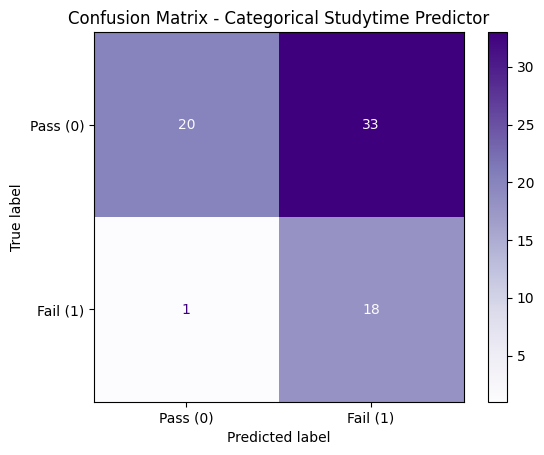


Accuracy: 0.5278
Precision: 0.3529
Recall (Selected Metric): 0.9474
F1-score: 0.5143

Interpretation of Confusion Matrix:
  True Negatives (Correctly predicted as passing): 20
  False Positives (Predicted as failing, but actually passed): 33
  False Negatives (Predicted as passing, but actually failed): 1
  True Positives (Correctly predicted as failing): 18


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare the feature (studytime) for training, treating it as categorical
# Use OneHotEncoder to convert 'studytime' into categorical features

# Create a OneHotEncoder instance
# handle_unknown='ignore' will allow the encoder to ignore categories not seen during fit
# sparse_output=False ensures a dense array output
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data and transform both train and test data
X_train_studytime_categorical = encoder.fit_transform(X_train[['studytime']])
X_test_studytime_categorical = encoder.transform(X_test[['studytime']])

# Create DataFrames with column names for better readability (optional, but good practice)
# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(['studytime'])
X_train_studytime_categorical_df = pd.DataFrame(X_train_studytime_categorical, columns=feature_names, index=X_train.index)
X_test_studytime_categorical_df = pd.DataFrame(X_test_studytime_categorical, columns=feature_names, index=X_test.index)


# Initialize and train the Logistic Regression model with balanced class weights
model_studytime_categorical = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
model_studytime_categorical.fit(X_train_studytime_categorical_df, y_train)

# Make predictions on the test set
y_pred_studytime_categorical = model_studytime_categorical.predict(X_test_studytime_categorical_df)

# Evaluate the model performance
print("\n--- Model Performance Evaluation (using categorical 'studytime') ---")

# Confusion Matrix
cm_cat = confusion_matrix(y_test, y_pred_studytime_categorical)
print("\nConfusion Matrix:")
print(cm_cat)

# Display the Confusion Matrix visually
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=['Pass (0)', 'Fail (1)'])
disp_cat.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Categorical Studytime Predictor")
plt.show()

# Accuracy
accuracy_cat = accuracy_score(y_test, y_pred_studytime_categorical)
print(f"\nAccuracy: {accuracy_cat:.4f}")

# Precision
precision_cat = precision_score(y_test, y_pred_studytime_categorical, pos_label=True)
print(f"Precision: {precision_cat:.4f}")

# Recall (for the 'failed' class, which is True or 1) - Metric selected in 2.1
recall_cat = recall_score(y_test, y_pred_studytime_categorical, pos_label=True)
print(f"Recall (Selected Metric): {recall_cat:.4f}")

# F1-score
f1_cat = f1_score(y_test, y_pred_studytime_categorical, pos_label=True)
print(f"F1-score: {f1_cat:.4f}")

print("\nInterpretation of Confusion Matrix:")
print(f"  True Negatives (Correctly predicted as passing): {cm_cat[0, 0]}")
print(f"  False Positives (Predicted as failing, but actually passed): {cm_cat[0, 1]}")
print(f"  False Negatives (Predicted as passing, but actually failed): {cm_cat[1, 0]}")
print(f"  True Positives (Correctly predicted as failing): {cm_cat[1, 1]}")

##### **2.6.** What is the difference between the two models you built in questions 2.4 and 2.5? Plot the predictions of each model over the range of `studytime` values in the test set. What are the advantages and disadvantages of each approach? **(2.00)**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


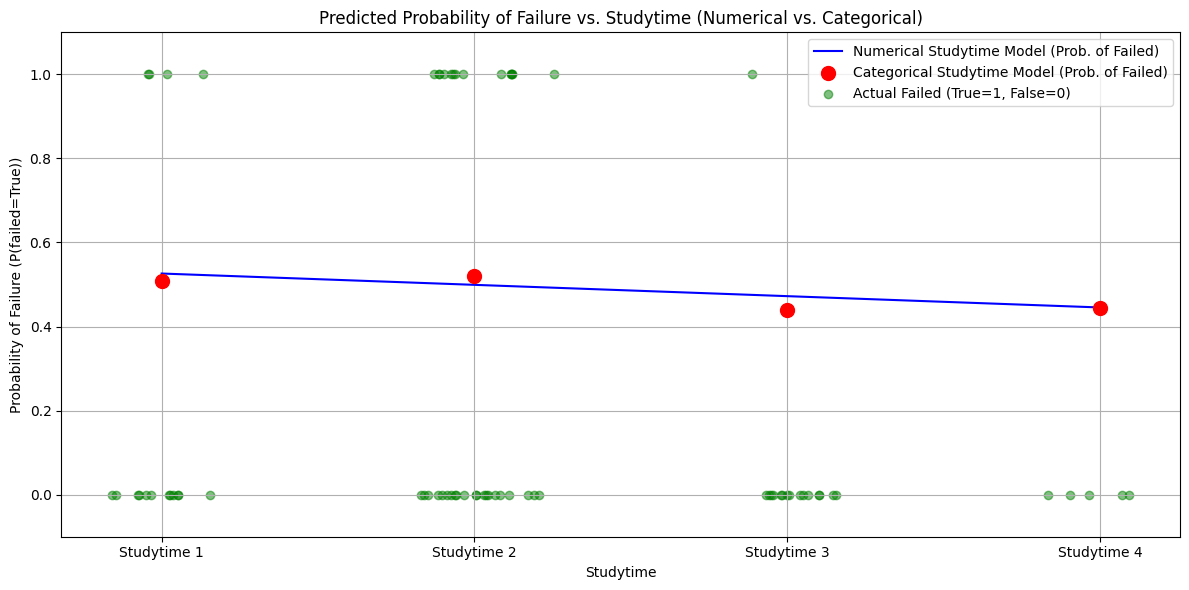

In [ ]:
plt.figure(figsize=(12, 6))

# --- Plotting for Numerical Studytime Model (from 2.4) ---

# Get the range of studytime values for plotting the curve
studytime_min = df['studytime'].min()
studytime_max = df['studytime'].max()
studytime_range_numerical = np.linspace(studytime_min, studytime_max, 300).reshape(-1, 1)

# Predict probabilities for the numerical model
probabilities_numerical = model_studytime_numerical.predict_proba(studytime_range_numerical)[:, 1] # Probability of 'failed' (True)

plt.plot(studytime_range_numerical, probabilities_numerical, label='Numerical Studytime Model (Prob. of Failed)', color='blue')


# --- Plotting for Categorical Studytime Model (from 2.5) ---

# Get unique studytime values and create dummy variables for them
studytime_categories = sorted(df['studytime'].unique())

# Create a DataFrame for prediction for each category
# Ensure the columns match the encoder's output
synthetic_categorical_X = pd.DataFrame({'studytime': studytime_categories})
encoded_synthetic_categorical_X = encoder.transform(synthetic_categorical_X[['studytime']])
encoded_synthetic_categorical_X_df = pd.DataFrame(encoded_synthetic_categorical_X, columns=encoder.get_feature_names_out(['studytime']))

# Predict probabilities for the categorical model
probabilities_categorical = model_studytime_categorical.predict_proba(encoded_synthetic_categorical_X_df)[:, 1] # Probability of 'failed' (True)

plt.scatter(studytime_categories, probabilities_categorical, color='red', marker='o', s=100, zorder=5, label='Categorical Studytime Model (Prob. of Failed)')


# --- Plotting actual test data ---
# Jitter points slightly for better visibility if they overlap
jitter = np.random.normal(0, 0.1, y_test.shape[0])
plt.scatter(X_test['studytime'] + jitter, y_test, color='green', alpha=0.5, label='Actual Failed (True=1, False=0)', zorder=1)

plt.title('Predicted Probability of Failure vs. Studytime (Numerical vs. Categorical)')
plt.xlabel('Studytime')
plt.ylabel('Probability of Failure (P(failed=True))')
plt.xticks(studytime_categories, [f'Studytime {c}' for c in studytime_categories]) # Label categorical x-axis points
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1) # Extend y-axis limits slightly for better visualization
plt.tight_layout()
plt.show()


# Part 3 - Regression (3.50)

##### In this part of the assignment, you'll approach the problem as a regression task, predicting the actual final grade `G3`. Use the same training and test sets you created in Part 1.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


##### **3.1.** Build a linear regression model to predict the final grade `G3`, using as predictor the feature `G2`. Evaluate the performance of the model on the test set using Mean Squared Error (MSE) and R-squared ($R^2$). **(0.50)**

In [ ]:
# Define features (X) and target (y) for this specific task
X_train_G2 = X_train[['G2']]
X_test_G2 = X_test[['G2']]
y_train_G3 = X_train['G3']
y_test_G3 = X_test['G3']

# Initialize and train the Linear Regression model
linear_model_G2 = LinearRegression()
linear_model_G2.fit(X_train_G2, y_train_G3)

# Make predictions on the test set
y_pred_G3_G2 = linear_model_G2.predict(X_test_G2)

# Evaluate the model performance
mse_g2 = mean_squared_error(y_test_G3, y_pred_G3_G2)
r2_g2 = r2_score(y_test_G3, y_pred_G3_G2)

print("--- Model Performance Evaluation (G3 predicted by G2) ---")
print(f"Mean Squared Error (MSE): {mse_g2:.4f}")
print(f"R-squared (R^2): {r2_g2:.4f}")

--- Model Performance Evaluation (G3 predicted by G2) ---
Mean Squared Error (MSE): 0.6652
R-squared (R^2): 0.9351


##### **3.2.** Print the equation of the model you built in question 3.1. Plot the predictions of the model as a function of the inputs, along with the actual data points from the test set. Interpret the coefficients of the model. **(1.00)**


--- Model Equation (G3 predicted by G2) ---
G3 = 0.9929 * G2 + 0.2559


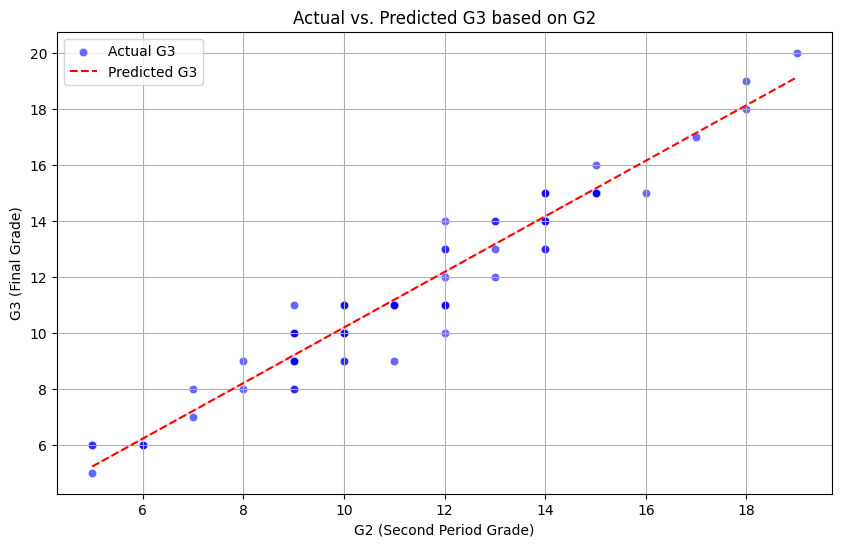


--- Interpretation of Coefficients ---
The intercept (0.2559) represents the predicted G3 when G2 is 0. However, in the context of grades, G2 cannot be 0 and the intercept alone doesn't have a direct interpretable meaning.
The coefficient for G2 (0.9929) indicates that for every one-unit increase in G2, the predicted G3 increases by 0.9929 units, assuming all other factors remain constant (which is not applicable here as G2 is the only predictor).
This high positive coefficient suggests a strong direct relationship: higher G2 grades are associated with higher predicted G3 grades.


In [ ]:
# Print the equation of the model
intercept = linear_model_G2.intercept_
coefficient = linear_model_G2.coef_[0]
print(f"--- Model Equation (G3 predicted by G2) ---")
print(f"G3 = {coefficient:.4f} * G2 + {intercept:.4f}")

# Plot the predictions and actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_G2['G2'], y=y_test_G3, label='Actual G3', color='blue', alpha=0.6)
sns.lineplot(x=X_test_G2['G2'], y=y_pred_G3_G2, label='Predicted G3', color='red', linestyle='--')
plt.title('Actual vs. Predicted G3 based on G2')
plt.xlabel('G2 (Second Period Grade)')
plt.ylabel('G3 (Final Grade)')
plt.grid(True)
plt.legend()
plt.show()

print("\n--- Interpretation of Coefficients ---")
print(f"The intercept ({intercept:.4f}) represents the predicted G3 when G2 is 0. However, in the context of grades, G2 cannot be 0 and the intercept alone doesn't have a direct interpretable meaning.")
print(f"The coefficient for G2 ({coefficient:.4f}) indicates that for every one-unit increase in G2, the predicted G3 increases by {coefficient:.4f} units, assuming all other factors remain constant (which is not applicable here as G2 is the only predictor).")
print("This high positive coefficient suggests a strong direct relationship: higher G2 grades are associated with higher predicted G3 grades.")

##### **3.3.** Build a linear regression model to predict the final grade `G3`, using as predictors all features except the variables related to the grades (`G1`, `G2`, `G3`, `failed`). Explain the choices you made. Evaluate the performance of the model on the test set using Mean Squared Error (MSE) and R-squared ($R^2$). Plot the predicted vs actual values of `G3` for the test set. **(1.00)**

--- Model Performance Evaluation (G3 predicted by all features except grades) ---
Mean Squared Error (MSE): 10.3655
R-squared (R^2): -0.0113


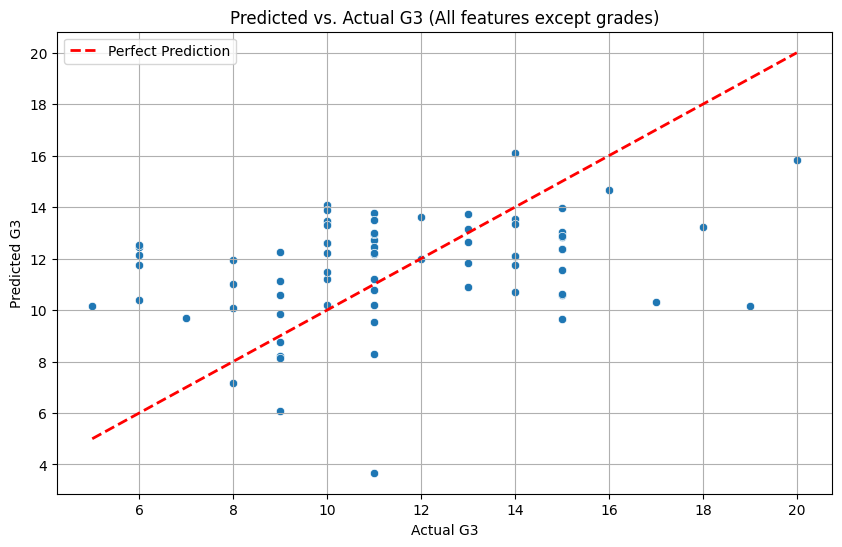

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the target variable for regression (G3) from the original splits
y_train_G3 = X_train['G3']
y_test_G3 = X_test['G3']

# Define features to exclude from the predictors (grades and the 'failed' target)
features_to_exclude = ['G1', 'G2', 'G3'] # 'failed' is already dropped when X was created

# Create feature sets without the excluded grades
X_train_regression = X_train.drop(columns=features_to_exclude)
X_test_regression = X_test.drop(columns=features_to_exclude)

# Identify categorical and numerical columns for preprocessing
categorical_features = X_train_regression.select_dtypes(include='object').columns
numerical_features = X_train_regression.select_dtypes(include=np.number).columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
# and leave numerical features untouched
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # In case there are any other columns not specified
)

# Apply the preprocessing to the training and test sets
X_train_processed = preprocessor.fit_transform(X_train_regression)
X_test_processed = preprocessor.transform(X_test_regression)

# If the output is a sparse matrix, convert to dense for LinearRegression (if needed)
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()
if hasattr(X_test_processed, 'toarray'):
    X_test_processed = X_test_processed.toarray()

# Initialize and train the Linear Regression model
linear_model_all_features = LinearRegression()
linear_model_all_features.fit(X_train_processed, y_train_G3)

# Make predictions on the test set
y_pred_G3_all_features = linear_model_all_features.predict(X_test_processed)

# Evaluate the model performance
mse_all = mean_squared_error(y_test_G3, y_pred_G3_all_features)
r2_all = r2_score(y_test_G3, y_pred_G3_all_features)

print("--- Model Performance Evaluation (G3 predicted by all features except grades) ---")
print(f"Mean Squared Error (MSE): {mse_all:.4f}")
print(f"R-squared (R^2): {r2_all:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_G3, y=y_pred_G3_all_features)
plt.plot([y_test_G3.min(), y_test_G3.max()], [y_test_G3.min(), y_test_G3.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Predicted vs. Actual G3 (All features except grades)')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.grid(True)
plt.legend()
plt.show()

##### **3.4.** In terms of application, what is the difference between building a model to predict student performance using the grades of the previous periods (as in question 3.1) versus using other features (as in question 3.3)? When would each approach be more appropriate? **(1.00)**

# Part 4 - Cross-validation (4.00)

##### **4.1.** Explain the concept of cross-validation and its importance in evaluating machine learning models. **(1.00)**

##### **4.2.** Describe how K-fold cross-validation works. What values of K should be used? Justify. **(1.00)**

##### **4.3.** Explain how K-Fold cross-validation should be done to choose the classification threshold for the logistic regression model of Part 2. **(2.00)**

# Part 5 - GitHub (1.00)

##### **5.1.** Describe how your group used GitHub to track changes throughout the project and explain why maintaining a clear change history is important in data analysis and machine learning work. **(1.00)**